In [1]:
import scipy
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

src_dir = os.path.join(os.getcwd(), "../src")
sys.path.append(src_dir)
from course_project.dynamics import *

## Torque Tracking with Coulomb Friction

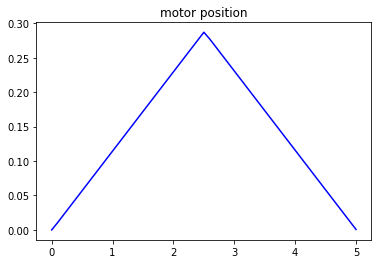

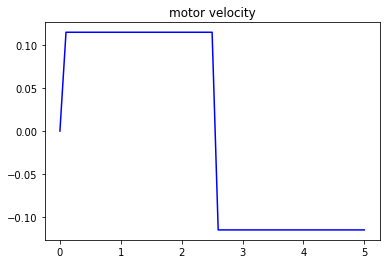

Text(0.5,0,'time')

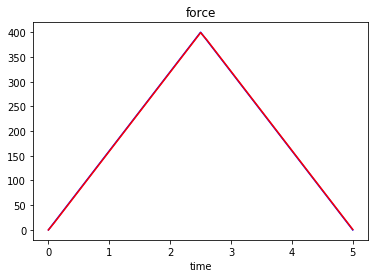

In [13]:
freq_hz = 0.1
dt = 0.01/freq_hz

T_max_force = 1.0/(4*freq_hz)
max_force = 400.0
T_final = 2 * T_max_force
t_vec = np.arange(0,2*T_max_force, dt)
N = t_vec.size
omega_vec = 2 * t_vec * np.pi * freq_hz
amplitude = 0.1  
x_b = amplitude/2.0 * (1 - np.cos(omega_vec))
x_b_dot = amplitude/2.0 * np.sin(omega_vec)



def fixture_position_function(t):
    return 0, 0

def torque_function(t):
    """
    Return the desired torque value
    """
    if t <= T_max_force:
        force = max_force*(t)/T_max_force
    else:
        force = max_force*(2*T_max_force - t)/T_max_force
        
    return force

def motor_torque_function(t,y,x_b, x_b_dot):
    return torque_function(t)


params = make_default_params()
# params['k_s'] = 2000
params['transmission_loss'] = 0.00
sys = SingleDofCoulombFriction(params)
sys._friction_tol = 1.0
sys.fixture_position_function = fixture_position_function
sys.motor_torque_function = motor_torque_function




# simulate
tol = None
tol = 1e-10
t_vec, y_vec = sys.simulate(t_vec, rtol=tol, atol=tol)



# desired torque
torque_function_vectorize = np.vectorize(torque_function)
torque_desired_vec = torque_function_vectorize(t_vec)

# actual torque
measured_torque = params['k_s'] * y_vec[:, 0]




# plot rotor position
plt.plot(t_vec, y_vec[:, 0], 'b')
plt.title("motor position")
plt.show()

plt.plot(t_vec, y_vec[:, 1], 'b')
plt.title("motor velocity")
plt.show()

# # plot the body position (externally specified)
# plt.plot(t_vec, x_b)
# plt.xlabel('time')
# plt.ylabel('x_b')
# plt.show()

plt.plot(t_vec, torque_desired_vec, 'b', label='desired force')
plt.plot(t_vec, measured_torque, 'r', label='measured force')
plt.title("force")
plt.xlabel('time')



# plt.show()



# # simulate the system
# t_out, yout, xout = scipy.signal.lsim(sys, x_b, t_vec)


# plt.plot(t_vec, force_desired, 'b')
# plt.title("force")
# plt.xlabel('time')
# plt.plot(t_out, yout, 'r')
# plt.show()
